<a href="https://colab.research.google.com/github/AlexeyUdod/aml/blob/master/aml_cv_0_hw.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


1. Возьмите датасет https://www.kaggle.com/ajayrana/hymenoptera-data
Реализуйте сверточную нейронную сеть с использованием tf.keras или keras. Используйте сверточные, пуллинговые и полносвязанные слои. Обучите на train выборке в течении 10 эпох, оцените качество на отложенной выборке

2. Добавьте в предыдущую архитектуру слои BatchNorm. Обучите на train выборке в течении 10 эпох, оцените качество на отложенной выборке

3. Создайте модель ResNet 50 (https://www.tensorflow.org/api_docs/python/tf/keras/applications/ResNet50), инициализированную случайными весами, и обучите ее на train выборке в течении 10 эпох, оцените качество на отложенной выборке

4. Создайте модель ResNet 50, инициализированную весами ImageNet, и обучите ее на train выборке в течении 10 эпох, оцените качество на отложенной выборке



In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras.layers import *
import numpy as np
import os

In [3]:
import platform
if platform.system() == 'Linux':
    path = '/content/drive/My Drive/Colab Notebooks/aml/CV/'
    from google.colab import drive
    drive.mount('/content/drive')
else:
    path = ''

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [15]:
def m_diff(x): return np.mean(np.diff(x))
def sigmoid(x): return 1/(1+np.exp(-np.array(x)))
def plot_history(fit): 
    plt.plot(sigmoid(fit.history['loss']), label='loss')
    plt.plot(sigmoid(fit.history['val_loss']), label='val_loss')
    plt.plot(fit.history['val_accuracy'], label='val_accuracy', c='r')
    plt.plot(fit.history['accuracy'], label='accuracy')
    plt.plot(np.array(fit.history['val_accuracy'])*0 + 0.5, c='b', label='0.5 lvl (binar zero)')
    plt.legend()
    plt.ylim(0,1)
    return
def shapes(array): 
    result = []
    for _ in range(100):
        try:
            iter(array)
        except:
            return result
        else:
            result.append(len(array))
        array = array[0]
    return result

Возьмите датасет https://www.kaggle.com/ajayrana/hymenoptera-data
Реализуйте сверточную нейронную сеть с использованием tf.keras или keras. Используйте сверточные, пуллинговые и полносвязанные слои. Обучите на train выборке в течении 10 эпох, оцените качество на отложенной выборке


In [5]:
gen = keras.preprocessing.image.ImageDataGenerator(rescale=1/255) #
target_size = (350, 500)

train = gen.flow_from_directory(path+'cv.0/hymenoptera_data/train', target_size=target_size, batch_size=32, class_mode='binary')
test = gen.flow_from_directory(path+'cv.0/hymenoptera_data/val', target_size=target_size, batch_size=32, class_mode='binary')

Found 244 images belonging to 2 classes.
Found 153 images belonging to 2 classes.


In [5]:
shapes(train), shapes(test)

([8, 2, 32, 350, 500, 3], [5, 2, 32, 350, 500, 3])

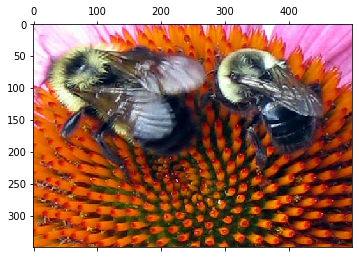

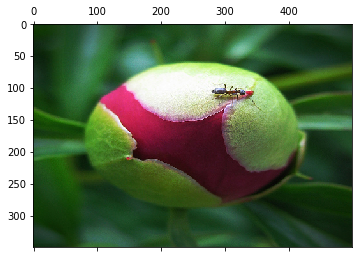

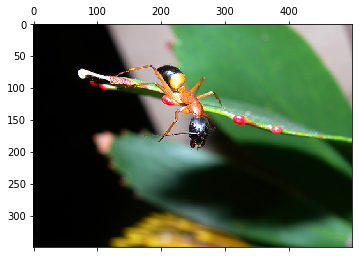

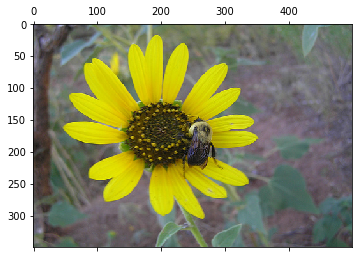

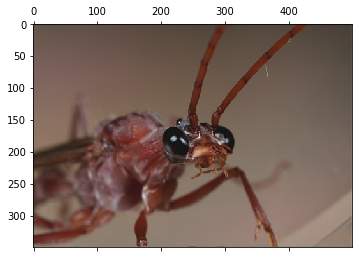

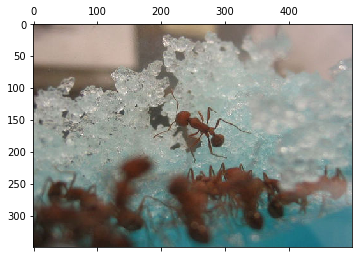

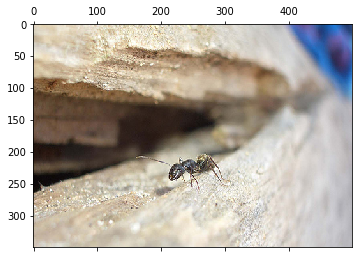

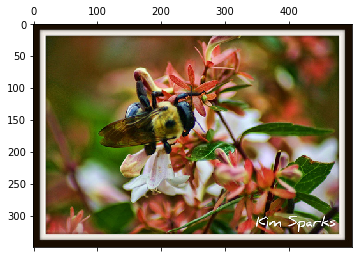

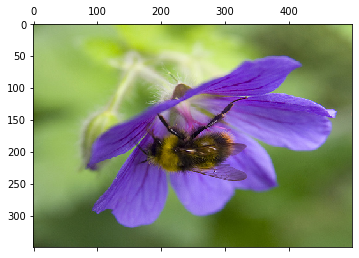

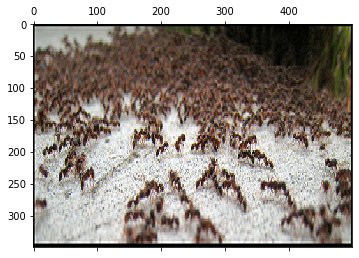

In [6]:
for i in range(10):
    plt.matshow(train[0][0][i])

Model: "functional_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_17 (InputLayer)        [(None, 350, 500, 3)]     0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 348, 498, 16)      448       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 174, 249, 16)      0         
_________________________________________________________________
re_lu_18 (ReLU)              (None, 174, 249, 16)      0         
_________________________________________________________________
dropout_18 (Dropout)         (None, 174, 249, 16)      0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 170, 245, 32)      12832     
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 85, 122, 32)     

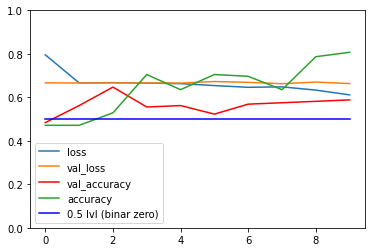

In [19]:
filters =  [16, 32, 64]
kernels =  [3, 5, 7]
dropouts = [0.1, 0.1, 0.1]
denses =   [1, 1, 1]

i = keras.layers.Input(shape=(*target_size, 3))

o = keras.layers.Conv2D(filters=filters[0], kernel_size=(kernels[0], kernels[0]))(i)
o = keras.layers.MaxPool2D((2,2))(o)
o = keras.layers.ReLU()(o)
o = Dropout(dropouts[0])(o)

o = keras.layers.Conv2D(filters=filters[1], kernel_size=(kernels[1], kernels[1]))(o)
o = keras.layers.MaxPool2D((2,2))(o)
o = keras.layers.ReLU()(o)
o = Dropout(dropouts[1])(o)

o = keras.layers.Conv2D(filters=filters[2], kernel_size=(kernels[2], kernels[2]))(o)
o = keras.layers.MaxPool2D((2,2))(o)
o = keras.layers.ReLU()(o)
o = Dropout(dropouts[2])(o)

o = keras.layers.Flatten()(o)

o = Dense(denses[0], 'sigmoid')(o)
# o = Dense(denses[1], 'relu')(o)
# o = Dense(denses[2], 'sigmoid')(o)

model = keras.Model(i, o)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()
fit = model.fit(train, epochs=10, validation_data=test)
plot_history(fit)

Добавьте в предыдущую архитектуру слои BatchNorm. Обучите на train выборке в течении 10 эпох, оцените качество на отложенной выборке

Model: "functional_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_16 (InputLayer)        [(None, 350, 500, 3)]     0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 348, 498, 16)      448       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 174, 249, 16)      0         
_________________________________________________________________
re_lu_15 (ReLU)              (None, 174, 249, 16)      0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 174, 249, 16)      64        
_________________________________________________________________
dropout_15 (Dropout)         (None, 174, 249, 16)      0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 170, 245, 32)    

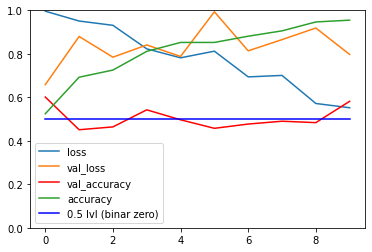

In [18]:
filters =  [16, 32, 64]
kernels =  [3, 5, 7]
dropouts = [0.1, 0.1, 0.1]
denses =   [1, 1, 1]

i = keras.layers.Input(shape=(*target_size, 3))

o = keras.layers.Conv2D(filters=filters[0], kernel_size=(kernels[0], kernels[0]))(i)
o = keras.layers.MaxPool2D((2,2))(o)
o = keras.layers.ReLU()(o)
o = keras.layers.BatchNormalization()(o)
o = Dropout(dropouts[0])(o)

o = keras.layers.Conv2D(filters=filters[1], kernel_size=(kernels[1], kernels[1]))(o)
o = keras.layers.MaxPool2D((2,2))(o)
o = keras.layers.ReLU()(o)
o = keras.layers.BatchNormalization()(o)
o = Dropout(dropouts[1])(o)

o = keras.layers.Conv2D(filters=filters[2], kernel_size=(kernels[2], kernels[2]))(o)
o = keras.layers.MaxPool2D((2,2))(o)
o = keras.layers.ReLU()(o)
o = keras.layers.BatchNormalization()(o)
o = Dropout(dropouts[2])(o)

o = keras.layers.Flatten()(o)

o = Dense(denses[0], 'sigmoid')(o)
# o = Dense(denses[1], 'relu')(o)
# o = Dense(denses[2], 'sigmoid')(o)

model = keras.Model(i,o)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()
fit = model.fit(train, epochs=10, validation_data=test)
plot_history(fit)

Создайте модель ResNet 50 (https://www.tensorflow.org/api_docs/python/tf/keras/applications/ResNet50), инициализированную случайными весами, и обучите ее на train выборке в течении 10 эпох, оцените качество на отложенной выборке

Model: "functional_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_21 (InputLayer)        [(None, 350, 500, 3)]     0         
_________________________________________________________________
tf_op_layer_strided_slice_5  [(None, 350, 500, 3)]     0         
_________________________________________________________________
tf_op_layer_BiasAdd_5 (Tenso [(None, 350, 500, 3)]     0         
_________________________________________________________________
resnet50 (Functional)        (None, None, None, 2048)  23587712  
_________________________________________________________________
flatten_12 (Flatten)         (None, 360448)            0         
_________________________________________________________________
dense_16 (Dense)             (None, 1)                 360449    
Total params: 23,948,161
Trainable params: 23,895,041
Non-trainable params: 53,120
____________________________________

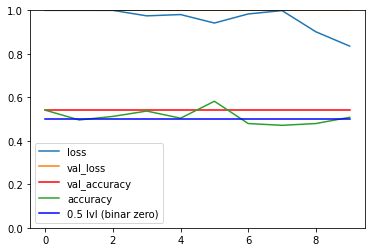

In [21]:
ResNet_random = tf.keras.applications.ResNet50(include_top=False, 
                                                 weights=None, 
                                                 input_tensor=None, 
                                                 input_shape=None, 
                                                 pooling=None,
                                                 classes=2)

i = keras.layers.Input(shape=(*target_size, 3))

o = tf.cast(i, tf.float32)
o = keras.applications.resnet50.preprocess_input(o)
o = ResNet_random(o)

o = keras.layers.Flatten()(o)
o = keras.layers.Dense(1, activation='sigmoid')(o)

model = keras.Model(inputs=i, outputs=o)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()
 
fit = model.fit(train, epochs=10, validation_data=test)

plot_history(fit)

Создайте модель ResNet 50, инициализированную весами ImageNet, и обучите ее на train выборке в течении 10 эпох, оцените качество на отложенной выборке

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 350, 500, 3)]     0         
_________________________________________________________________
tf_op_layer_strided_slice_1  [(None, 350, 500, 3)]     0         
_________________________________________________________________
tf_op_layer_BiasAdd_1 (Tenso [(None, 350, 500, 3)]     0         
_________________________________________________________________
resnet50 (Functional)        (None, None, None, 2048)  23587712  
_________________________________________________________________
flatten_1 (Flatten)          (None, 360448)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 360449    
Total params: 23,948,161
Trainable params: 360,449
Non-trainable params: 23,587,712
____________________________________

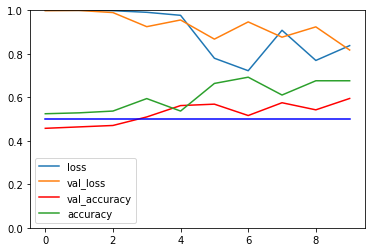

In [8]:
ResNet_imagenet = tf.keras.applications.ResNet50(include_top=False, 
                                                 weights='imagenet', 
                                                 input_tensor=None, 
                                                 input_shape=None, 
                                                 pooling=None)

i = keras.layers.Input(shape=(*target_size, 3))
o = tf.cast(i, tf.float32)
o = keras.applications.resnet50.preprocess_input(o)
o = ResNet_imagenet(o)
o = keras.layers.Flatten()(o)
o = keras.layers.Dense(1, activation='sigmoid')(o)
  
ResNet_imagenet.trainable = False

model = keras.Model(inputs=i, outputs=o)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()
 
fit = model.fit(train, epochs=10, validation_data=test)

plot_history(fit)